In [198]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [199]:
df=pd.read_csv('titanic_toy.csv')
df.sample()

,Age,Fare,Family,Survived
425,NaN,7.25,0,0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [201]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [202]:
# we can see age and Fare is having a lots of null values
# fill them with mean and median values
# df['Age_mean']=df['Age'].fillna(df['Age'].mean())
# df['Age_median']=df['Age'].fillna(df['Age'].median())
# df.sample(10)

# df['Fare_mean']=df['Fare'].fillna(df['Fare'].mean())
# df['fare_median']=df['Fare'].fillna(df['Fare'].median())
# df.sample(12)


In [203]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [204]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [205]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [206]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [207]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((623, 3), (268, 3), (623,), (268,))

In [208]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [209]:
mean_age,median_age,mean_fare,median_fare

(29.256352705410823, 28.0, 31.79834806070826, 14.4542)

In [210]:
x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)
x_train['Fare_median']=x_train['Fare'].fillna(median_fare)

In [211]:
x_train.sample(20)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
0,22.0,7.2500,1,22.000000,22.0,7.250000,7.2500
42,NaN,7.8958,0,29.256353,28.0,7.895800,7.8958
11,58.0,26.5500,0,58.000000,58.0,26.550000,26.5500
640,20.0,7.8542,0,20.000000,20.0,7.854200,7.8542
349,42.0,8.6625,0,42.000000,42.0,8.662500,8.6625
878,NaN,NaN,0,29.256353,28.0,31.798348,14.4542
64,NaN,27.7208,0,29.256353,28.0,27.720800,27.7208
423,28.0,14.4000,2,28.000000,28.0,14.400000,14.4000
269,35.0,135.6333,0,35.000000,35.0,135.633300,135.6333
41,27.0,21.0000,1,27.000000,27.0,21.000000,21.0000


In [212]:
# to check the variance effect on training data with mean and median
print("original age variance:",x_train['Age'].var())
print("mean variance:",x_train['Age_mean'].var())
print("median variance:",x_train['Age_median'].var())
print("origianal fare variance:",x_train['Fare'].var())
print("fare mean variance:",x_train['Fare_mean'].var())
print("fare median variance:",x_train['Fare_median'].var())


original age variance: 211.9518806464334
mean variance: 169.69780797736954
median variance: 169.94984651902163
origianal fare variance: 2666.9296723129737
fare mean variance: 2538.2996238091323
fare median variance: 2552.1099348908238


<Axes: title={'center': 'Fare'}, xlabel='Fare', ylabel='Density'>

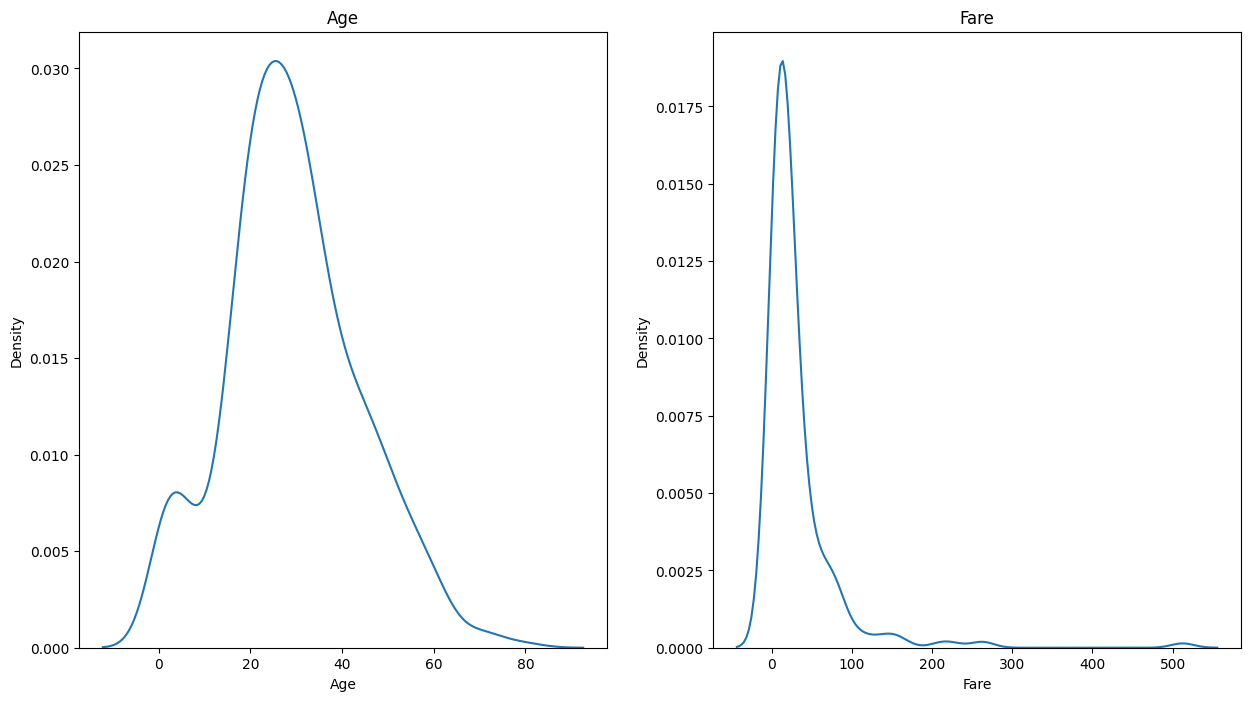

In [213]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
ax1.set_title("Age")
sns.kdeplot(x_train['Age'],ax=ax1)
ax2.set_title("Fare")
sns.kdeplot(x_train['Fare'],ax=ax2)

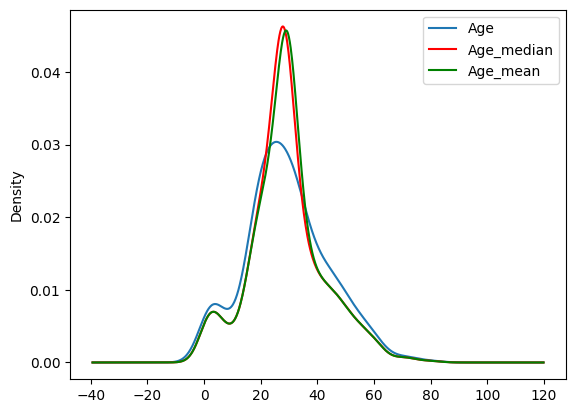

In [214]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')
ax.legend()


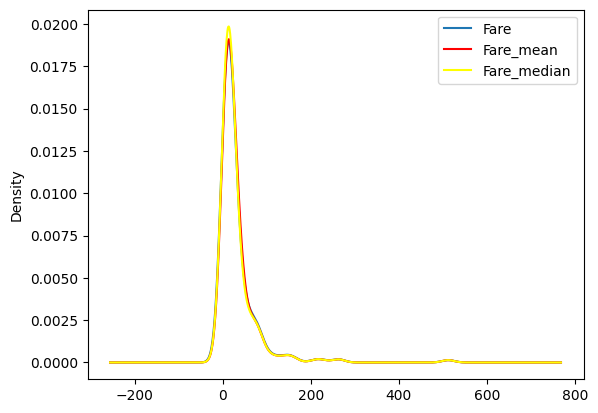

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')
x_train['Fare_median'].plot(kind='kde',ax=ax,color='yellow')
ax.legend()

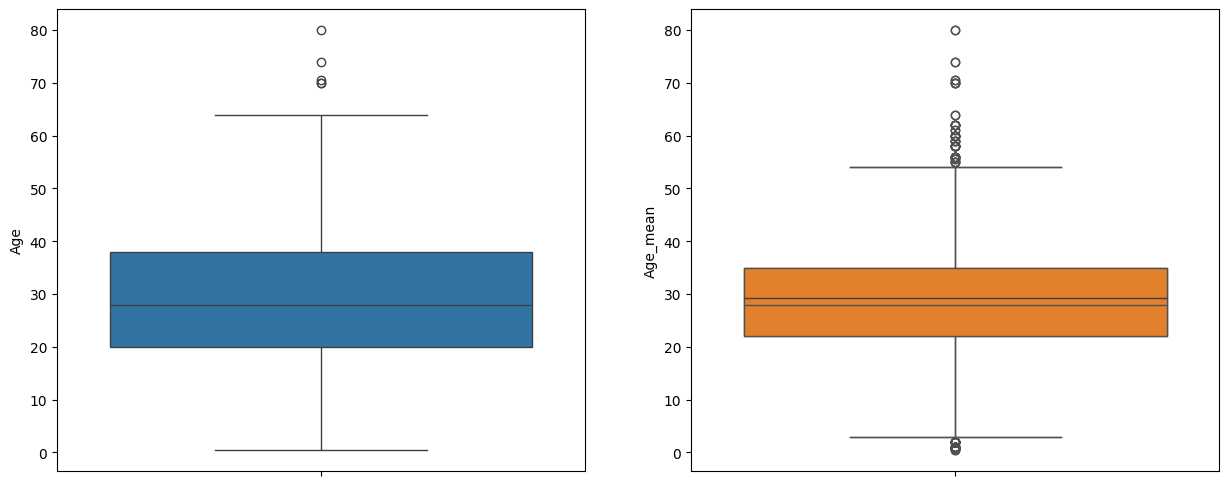

In [216]:
# to find outliers between them
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x_train['Age'],ax=ax1)
sns.boxplot(x_train['Age_mean'],ax=ax2)
sns.boxplot(x_train['Age_median'],ax=ax2)
ax.legend()

<Axes: >

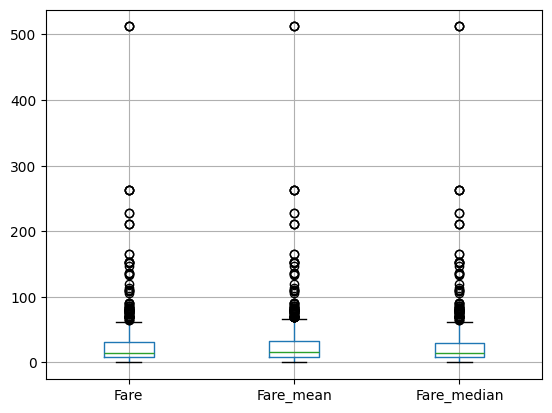

In [217]:
x_train[['Fare','Fare_mean','Fare_median']].boxplot()
# the outliers are not much more when compared to original fare with mean/median fare

<Axes: >

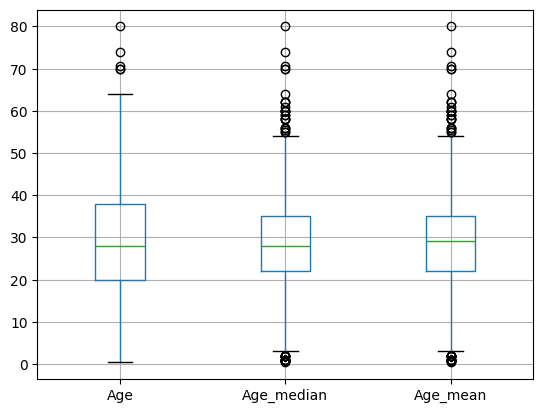

In [218]:
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()
# we can see the outliers increases when compared to mean/median age than the origianl because of that only we dont use mean/median

* cov() → tells how much two variables move together (depends on units).
* corr() → tells how strongly two variables are related, in a standardized way (unitless).
* Both use mean, not median.
* cov range btween (depends on units)
* corr range btw(-1 to 1)

In [219]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.088197,-0.310167,1.000000,1.000000,0.085804,0.083017
Fare,0.088197,1.000000,0.205140,0.084564,0.088616,1.000000,1.000000
Family,-0.310167,0.205140,1.000000,-0.246123,-0.245186,0.203104,0.203157
Age_mean,1.000000,0.084564,-0.246123,1.000000,0.999258,0.082658,0.080023
Age_median,1.000000,0.088616,-0.245186,0.999258,1.000000,0.086607,0.083857
Fare_mean,0.085804,1.000000,0.203104,0.082658,0.086607,1.000000,0.997291
Fare_median,0.083017,1.000000,0.203157,0.080023,0.083857,0.997291,1.000000


In [220]:
x_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,211.951881,71.822073,-6.932603,211.951881,211.951881,67.757268,65.775061
Fare,71.822073,2666.929672,18.612474,56.998513,59.765747,2666.929672,2666.929672
Family,-6.932603,18.612474,2.997027,-5.550541,-5.533529,17.714766,17.767537
Age_mean,211.951881,56.998513,-5.550541,169.697808,169.697808,54.249388,52.662348
Age_median,211.951881,59.765747,-5.533529,169.697808,169.949847,56.883154,55.227061
Fare_mean,67.757268,2666.929672,17.714766,54.249388,56.883154,2538.299624,2538.299624
Fare_median,65.775061,2666.929672,17.767537,52.662348,55.227061,2538.299624,2552.109935


## Calculating mean/median using Sklearn library

In [221]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [222]:
from sklearn.impute import SimpleImputer

In [223]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

# using column Transformer

In [224]:
from sklearn.compose import ColumnTransformer

In [225]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [226]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [227]:
trf.fit(x_train)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Age']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [228]:
trf.named_transformers_['imputer1'].statistics_

array([29.49884615])

In [229]:
trf.named_transformers_['imputer2'].statistics_

array([14.4])

In [230]:
x_train_transform = trf.transform(x_train)
X_test_transform = trf.transform(x_test)

In [231]:
x_train_transform

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.4   ,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])